# En analyse av ngrammer

Her skal vi se litt på hva som brukes i analyse av tekster og det som trengs av formelle begreper. Temaet er kjønn og Beauvoirs tese om at kvinnen er et sekundært kjønn, og at menn og kvinner er knyttet til forskjellige egenskaper. 

Start med å importere de kommandoene som trengs fra nbtext

## Huskeliste

In [1]:
import nbtext as nb
%matplotlib inline

### Lag ngram for et sett pronomen

Bruk kommandoen nb_ngram() for hente ngrammer, de samme som ligger på web.

In [2]:
pron = nb.nb_ngram('han,hun, henne, ham, hans, hennes', years=(1980,2000), smooth=1)

## Resultatet er en dataramme

Datarammer brukes flittig i alt fra ngrammer til tekstanalyse. Matrisene er en måte å representere kvantitative språklige data.

Når en navn er knyttet til data, er det bare å skrive navnet i en celle for å se verdien.

In [3]:
pron

,han,hun,henne,ham,hans,hennes
1980,0.560826,0.184280,0.054719,0.089331,0.088442,0.024705
1981,0.528530,0.178862,0.050258,0.086266,0.081664,0.023710
1982,0.508471,0.189271,0.052591,0.081709,0.078190,0.026218
1983,0.475342,0.186673,0.050842,0.079632,0.077191,0.022853
1984,0.457172,0.162887,0.044308,0.070117,0.074788,0.023193
1985,0.546739,0.211806,0.060764,0.092543,0.086458,0.028688
1986,0.466456,0.208164,0.058267,0.078152,0.073994,0.028763
1987,0.501457,0.202460,0.057231,0.082637,0.084415,0.028094
1988,0.484661,0.204572,0.055191,0.081695,0.075582,0.027977
1989,0.450755,0.174308,0.046727,0.074758,0.070489,0.024164


## Matrisen kan begrenses til mindre biter

Matrisene kan deles opp i mindre biter

In [ ]:
pron[['han', 'hun']]

## Plotting gir et kjapt visuelt overblikk

Matriser med tall kan plottes over indeksene ved å legget plot() til navnet.

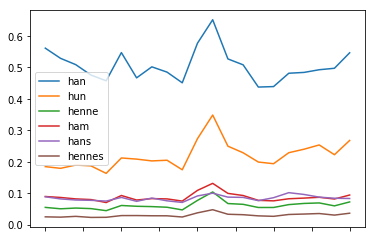

In [4]:
pron.plot();

Størrelsen på plottet kan endres

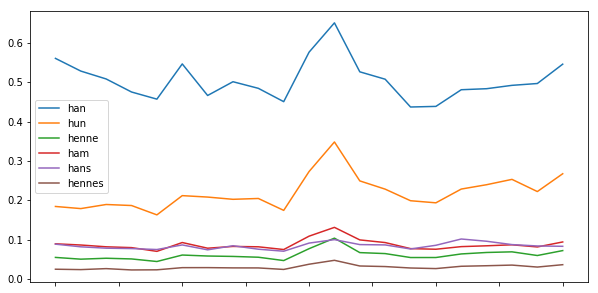

In [5]:
pron.plot(figsize=(10,5));

# Men hva med analyse? 

## Ordene kan divideres ved å refere til matrisen og kolonnene

Poenget med datarammer/matriser er at fra dataene kan vi beregne nye data, for eksemple forholdstallet mellom 'han' og 'hun' fordelt over år.

In [6]:
pron['han']

1980    0.560826
1981    0.528530
1982    0.508471
1983    0.475342
1984    0.457172
1985    0.546739
1986    0.466456
1987    0.501457
1988    0.484661
1989    0.450755
1990    0.576608
1991    0.651152
1992    0.526630
1993    0.507842
1994    0.437163
1995    0.438728
1996    0.481107
1997    0.483727
1998    0.492249
1999    0.496918
2000    0.546125
Name: han, dtype: float64

In [7]:
pron['han']/pron['hun']

1980    3.043341
1981    2.954962
1982    2.686471
1983    2.546383
1984    2.806687
1985    2.581324
1986    2.240811
1987    2.476821
1988    2.369141
1989    2.585965
1990    2.111251
1991    1.869644
1992    2.112625
1993    2.224334
1994    2.198413
1995    2.266832
1996    2.105208
1997    2.018831
1998    1.944377
1999    2.236587
2000    2.041664
dtype: float64

### Lag ramme fra noe som ligner, men som ikke er det
Bruk kommandoen frame() for å lage en ny ramme av ratioen, den tar to argument, det første er det som skal bli en ramme, og det andre er navnet på rammen. Navn er viktig når rammer skal kombineres, som i neste celle.


In [8]:
nb.frame(pron['han']/pron['hun'], 'han/hun')

,han/hun
1980,3.043341
1981,2.954962
1982,2.686471
1983,2.546383
1984,2.806687
1985,2.581324
1986,2.240811
1987,2.476821
1988,2.369141
1989,2.585965


### Forholdstallene kan kombineres og plottes på nytt


Uttrykket under kan se litt formidabelt ut, men vi skal gå gjennom og ta det fra hverandre.

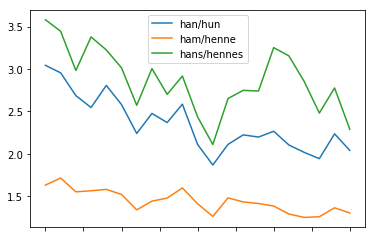

In [9]:
nb.frame(pron['han']/pron['hun'], 'han/hun').join(
nb.frame(pron['ham']/pron['henne'], 'ham/henne'). join(
nb.frame(pron['hans']/pron['hennes'], 'hans/hennes'))).plot()

## Hva med "ham" vs "han" som objekt?

Hvordan kan vi finne ut om pronomenet 'han' også brukes som objekt, og hvor ofte? I norsk har det vært frivillig å bruke 'han' som objekt. Forekomsten kan sjekkes ved å se på trigram som presser frem en objektstolkning av 'han'. Her skal vi teste mot trigrammer av typen "preposisjon han .", som skulle sikre oss at 'han' er objekt for preposisjonen.

In [10]:
obj = nb.nb_ngram("med ham ., med han ., til han ., til ham ., ved han ., ved ham .", years=(1980, 2000), smooth=1)

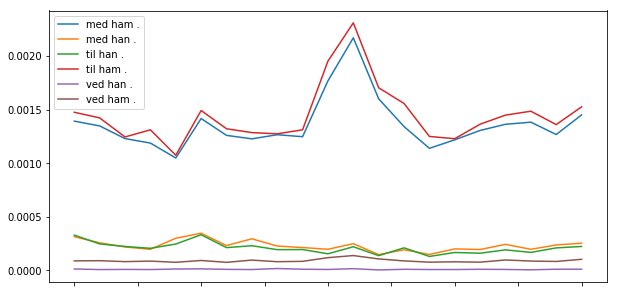

In [12]:
obj.plot(figsize=(10,5))

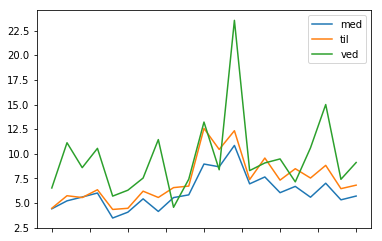

In [13]:
nb.frame(obj['med ham .']/obj['med han .'], 'med').join(
nb.frame(obj['til ham .']/obj['til han .'], 'til'). join(
nb.frame(obj['ved ham .']/obj['ved han .'], 'ved'))).plot();

Variasjonen ligger mellom 5 og 10, så omtrent hvert 7nde

In [15]:
nb.frame(obj['med ham .']/obj['med han .'], 'med').join(
nb.frame(obj['til ham .']/obj['til han .'], 'til'). join(
nb.frame(obj['ved ham .']/obj['ved han .'], 'ved'))).mean()

med    6.163977
til    7.330358
ved    9.579005
dtype: float64

In [ ]:
obj2 = nb.nb_ngram('til ham, til han', years=(1980, 2000),smooth=1)

In [ ]:
obj2.plot()

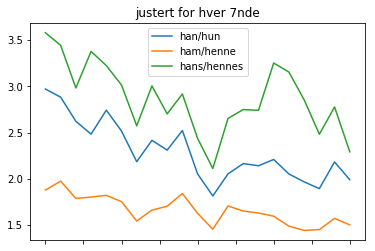

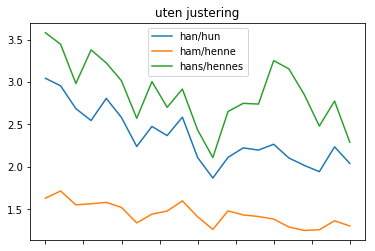

In [16]:
nb.frame((pron['han'] - pron['ham']*0.15)/pron['hun'], 'han/hun').join(
nb.frame((pron['ham'] + pron['ham']*0.15)/pron['henne'], 'ham/henne'). join(
nb.frame(pron['hans']/pron['hennes'], 'hans/hennes'))).plot(title='justert for hver 7nde');
nb.frame(pron['han']/pron['hun'], 'han/hun').join(
nb.frame(pron['ham']/pron['henne'], 'ham/henne'). join(
nb.frame(pron['hans']/pron['hennes'], 'hans/hennes'))).plot(title='uten justering');

# Hva med verb og kjønn?

Her nøyer vi oss med å se på plottene.

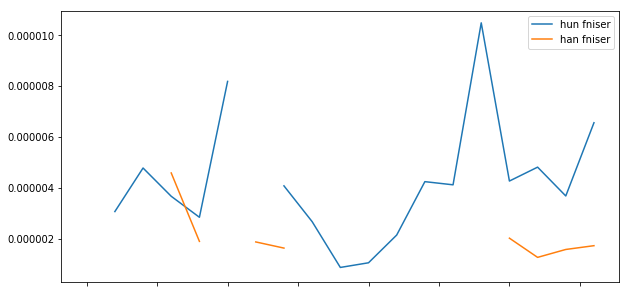

In [17]:
nb.nb_ngram("hun fniser, han fniser", years=(1980, 2000), smooth=1).plot(figsize=(10,5));

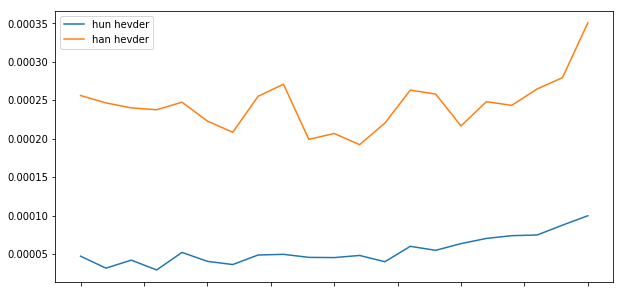

In [18]:
nb.nb_ngram("hun hevder, han hevder", years=(1980, 2000), smooth=1).plot(figsize=(10,5));

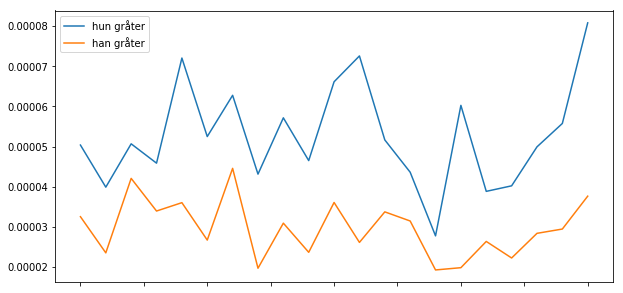

In [19]:
nb.nb_ngram("hun gråter, han gråter", years=(1980, 2000), smooth=1).plot(figsize=(10,5));

In [ ]:
nb.nb_ngram("hun skjøt, han skjøt", years=(1980, 2000), smooth=1).plot(figsize=(10,5));

Når blå ligger høyere, er det lurt å sjekke om verbene trekker mot det mannlige eller det kvinnelige

In [ ]:
nb.nb_ngram("hun føler, han føler", years=(1980, 2000), smooth=1).plot(figsize=(10,5));

In [21]:
føler = nb.nb_ngram("hun føler, han føler", years=(1980, 2000), smooth=1)

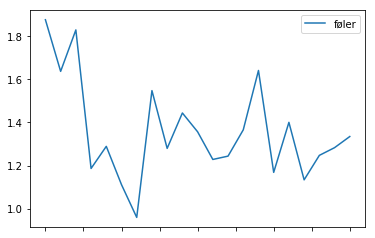

In [22]:
nb.frame(føler['han føler']/føler['hun føler'], 'føler').plot()

In [ ]:
nb.frame((pron['han'] - pron['ham']*0.15)/pron['hun'], 'han/hun').join(
    nb.frame(føler['han føler']/føler['hun føler'], 'føler')).plot()

In [ ]:
skjøt = nb.nb_ngram("hun skjøt, han skjøt", years=(1980, 2000), smooth=1)


In [ ]:
nb.frame((pron['han'] - pron['ham']*0.15)/pron['hun'], 'han/hun').join(
    nb.frame(skjøt['han skjøt']/skjøt['hun skjøt'], 'skjøt')).plot()

# Oppgave

Repeter øvelsen med avisdata

In [ ]:
nb.nb_ngram('han, hun', corpus='avis', years=(1980,2000),smooth=1).plot()